# **Libraries. Dataset. Data Frame**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [ ]:
# Load and prepare the Boston Housing dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
# Create a DataFrame
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(data, columns=column_names)
df['PRICE'] = target

<ipython-input-142-36c4d9e8207b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PRICE'])


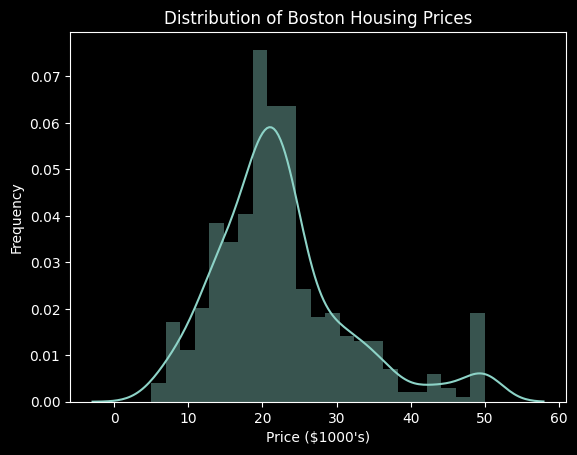

In [ ]:
sns.distplot(df['PRICE'])
plt.title('Distribution of Boston Housing Prices')
plt.xlabel('Price ($1000\'s)')
plt.ylabel('Frequency')
plt.style.use("dark_background")
color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True, )
plt.show()

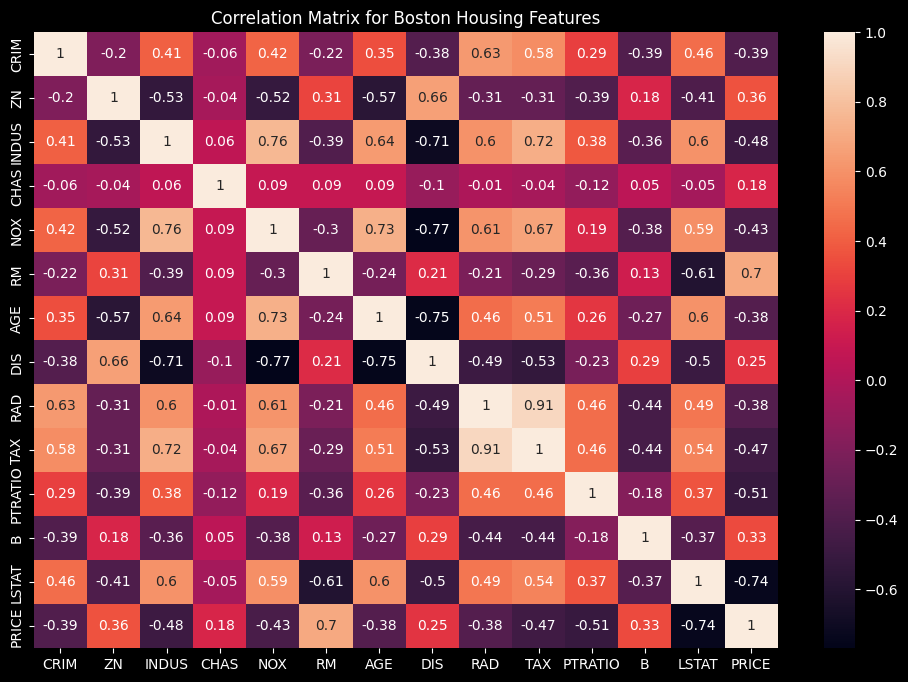

In [ ]:
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Correlation Matrix for Boston Housing Features')
plt.show()

In [ ]:
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate the Mean Squared Error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 20.869292183770686


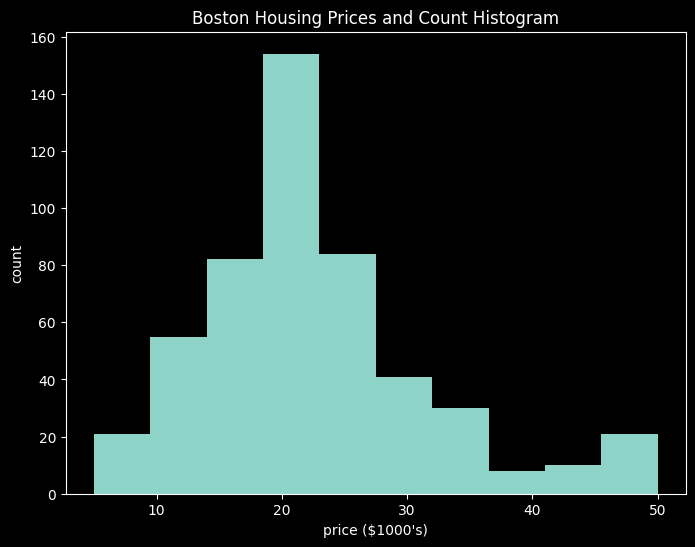

In [ ]:
plt.figure(figsize=(8, 6));
plt.hist(df['PRICE']);
plt.title('Boston Housing Prices and Count Histogram');
plt.xlabel('price ($1000\'s)');
plt.ylabel('count');
plt.show();

In [ ]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_predict = reg_all.predict(X_train)

In [ ]:
# Root Mean Squarde Error > Perbedaan antara nilai yang diprediksi
rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')

The model performance for training set
--------------------------------------
RMSE is 4.741000992236516
R2 score is 0.74


In [ ]:
y_pred = reg_all.predict(X_test)

In [ ]:
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2: {r2}")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.568292042303193
R^2: 0.73


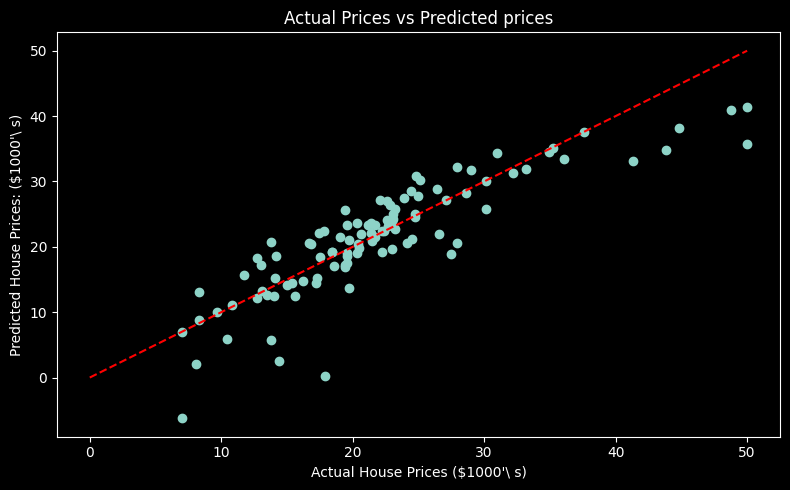

In [ ]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test, y_pred);
plt.plot([0, 50], [0, 50], '--r');
#plt.axis('tight');
plt.xlabel("Actual House Prices ($1000'\ s)");
plt.ylabel("Predicted House Prices: ($1000'\ s)");
#plt.xticks(range(0, int(max(y_test)),2));
#plt.yticks(range(0, int(max(y_test)),2));
plt.title("Actual Prices vs Predicted prices");
plt.tight_layout();

In [ ]:
print("RMS: %r " % np.sqrt(np.mean((y_test - y_pred) ** 2)))

RMS: 4.568292042303193 


# **Describe**

In [ ]:
data = pd.DataFrame(raw_df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df. describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


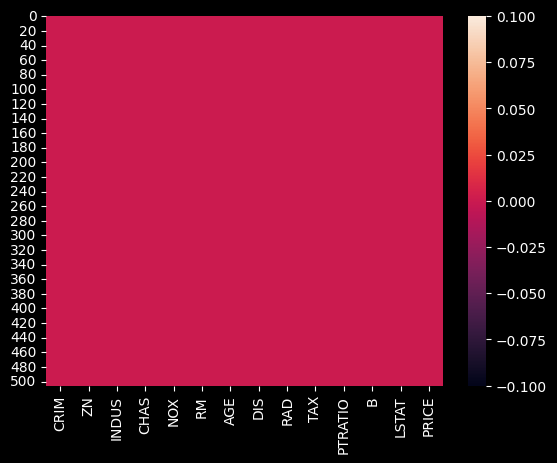

In [ ]:
sns.heatmap(df.isnull())
plt.style.use("dark_background")
color_palette = sns.diverging_palette(250, 0, center = 'dark', as_cmap = True)

In [ ]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(11, 11)

# **Pearson Correlation**

<ipython-input-159-9b51a43f251f>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


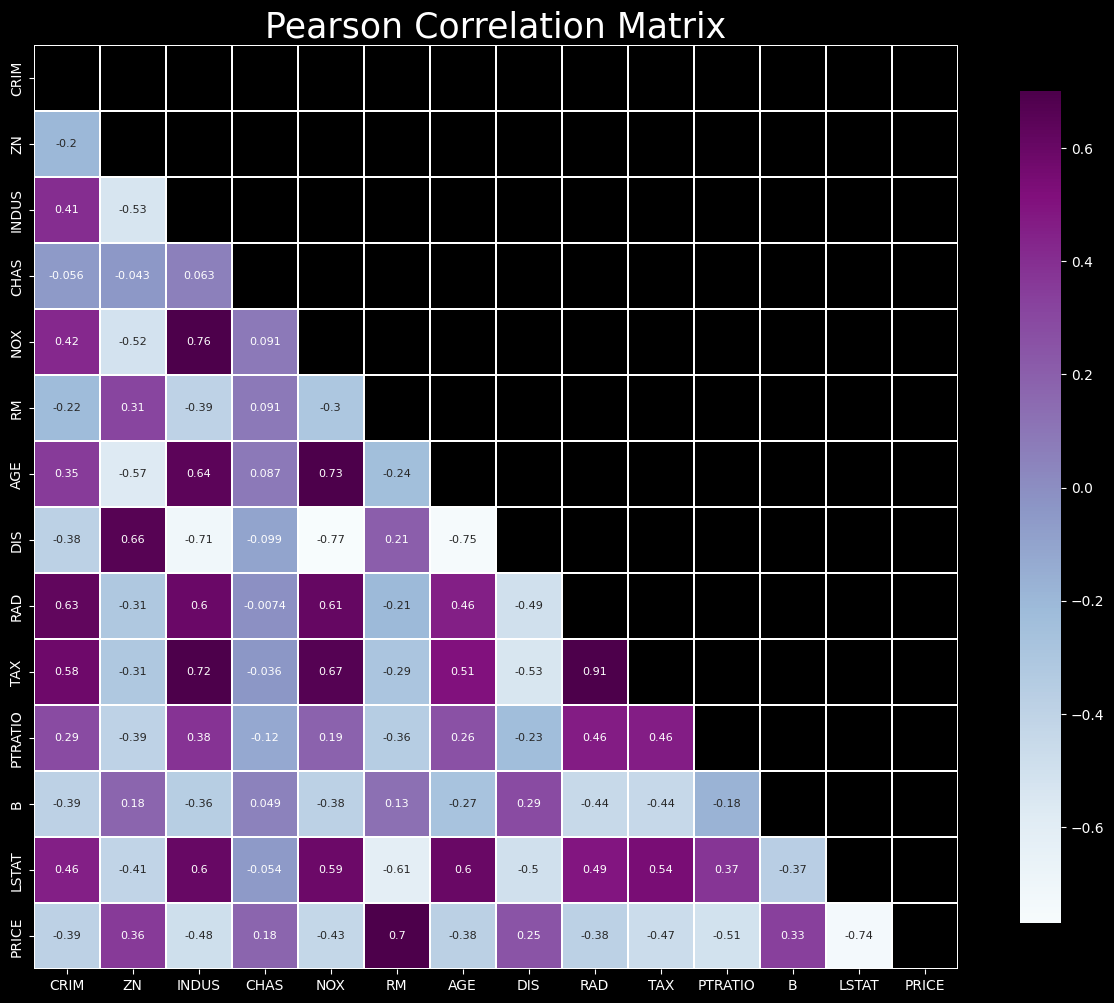

In [ ]:
correlation_matrix = df.corr().round(2)

mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix', fontsize=25)

sns.heatmap(df.corr(), linewidth=0.25, vmax=0.7, square=True, cmap='BuPu',
           linecolor='w', annot=True, annot_kws={'size': 8}, mask=mask, cbar_kws={'shrink': .9});

# **MSE & R2**

In [ ]:
# Split Data > features (X) and target (y)
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Split Data > Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# linear Regression Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict Data Test
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

NameError: ignored

# **Standard Scaler > REGRESI Ridge**

In [ ]:
# Split Data > features (X) and target (y)
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Split Data > Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Mean Squared Error: 20.78


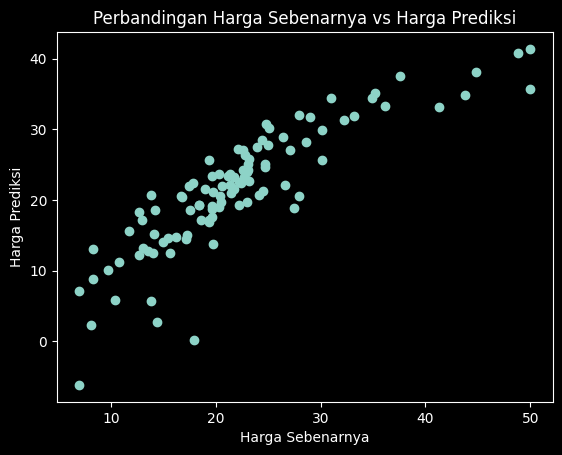

In [ ]:
# Membuat Model Regresi Ridge
ridge = Ridge(alpha=1.0)

# Train Model
ridge.fit(X_train, y_train)

# Predict Model Data Test
y_pred = ridge.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

plt.scatter(y_test, y_pred)
plt.xlabel("Harga Sebenarnya")
plt.ylabel("Harga Prediksi")
plt.title("Perbandingan Harga Sebenarnya vs Harga Prediksi")
plt.show()


# **Linear Regression**

In [ ]:
lm = LinearRegression()

NameError: ignored

### **Train Data**

In [ ]:
# Train Model Train Sets
lm.fit(X_train, y_train)

NameError: ignored

In [ ]:
# Value of y intercept
lm.intercept_

22.646782178217823

### **Model Evaluation**

In [ ]:
# Predict Train Data
y_pred = lm.predict(X_train)

NameError: ignored

In [ ]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.738339392059052
Adjusted R^2: 0.7296173717943537
MAE: 3.350009519648453
MSE: 22.477090408387625
RMSE: 4.741000992236516


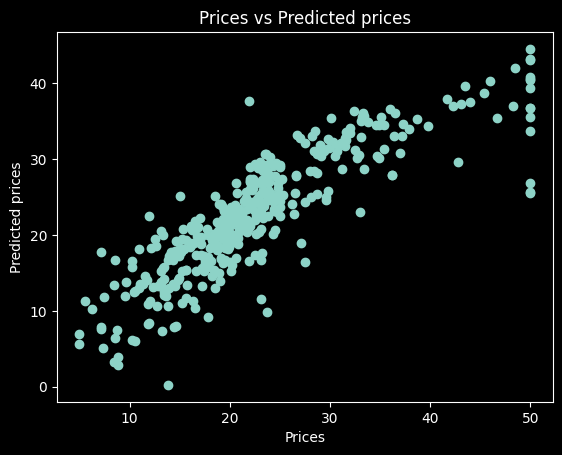

In [ ]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

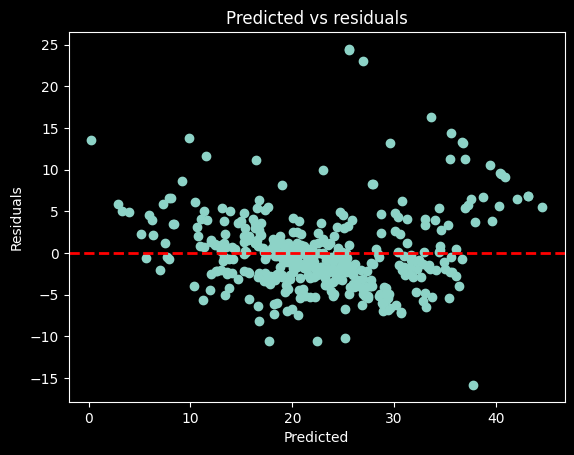

In [ ]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.axhline(color='red', linestyle='--', linewidth=2)
plt.show()

<ipython-input-172-3959bf587b5e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


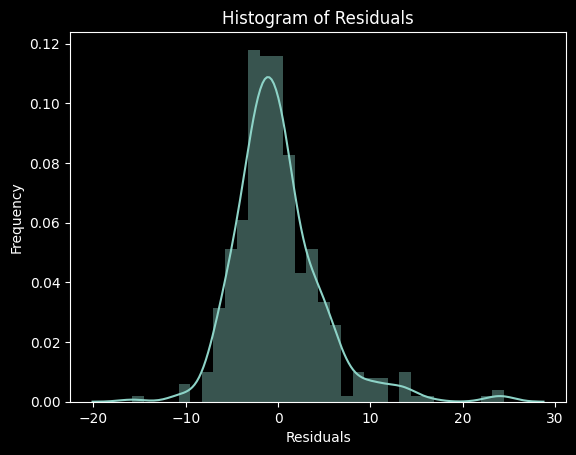

In [ ]:
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### **Test Data**

In [ ]:
# Predicting Test Data
y_test_pred = lm.predict(X_test)

# Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
mae_linreg = metrics.mean_absolute_error(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

NameError: ignored

# **Random Forest Regressor**

In [ ]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

### **Train Data**

In [ ]:
# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train Model Sets
reg.fit(X_train, y_train)

RandomForestRegressor()

### **Model Evaluation**

In [ ]:
# Predict Train Data
y_pred = reg.predict(X_train)

In [ ]:
# Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.980604594759488
Adjusted R^2: 0.979958081251471
MAE: 0.865091584158416
MSE: 1.6660982351485172
RMSE: 1.290774277381029


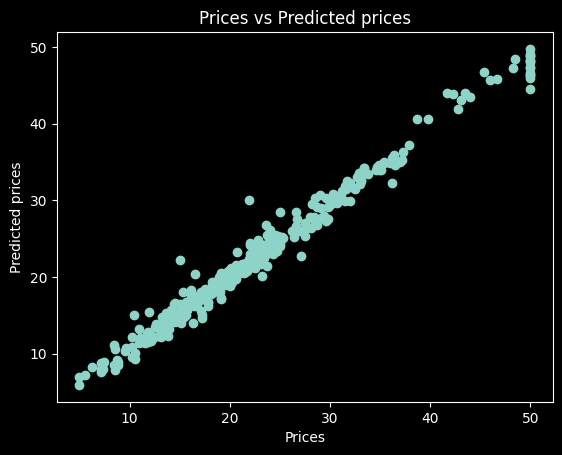

In [ ]:
# Visualizing the differences between Actual Prices and Predicted Values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

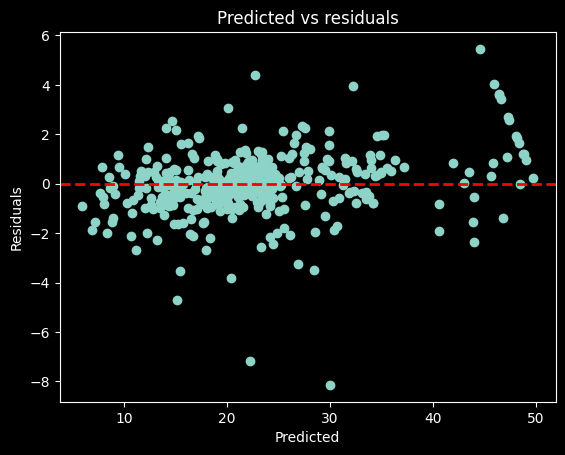

In [ ]:
# Checking Residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.axhline(color='red', linestyle='--', linewidth=2)
plt.show()

### **Test Data**

In [ ]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [ ]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
mae_rf = metrics.mean_absolute_error(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8676458584075728
Adjusted R^2: 0.8480935420359642
MAE: 2.1987647058823514
MSE: 10.362517784313715
RMSE: 3.21908648288823


# **SVM Regressor**

In [ ]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Train**

In [ ]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [ ]:
# Train model use Train Sets
reg.fit(X_train, y_train)

# Prediction Train Sets
y_pred = reg.predict(X_train)

### **Model Evaluation**

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6644228558640692
Adjusted R^2: 0.6532369510595382
MAE: 2.9639237513741015
MSE: 28.826646345766008
RMSE: 5.369045198707681


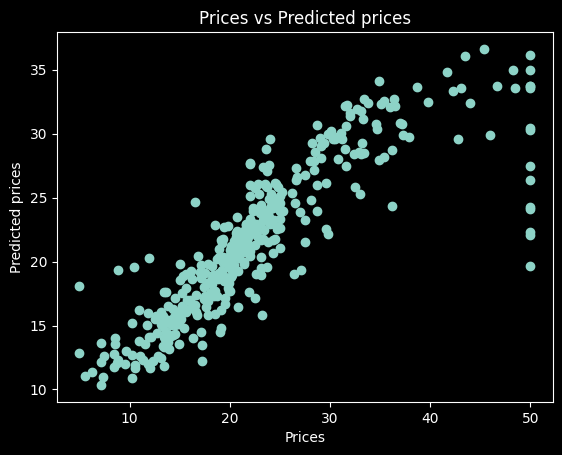

In [ ]:
# Visualizing the differences between Actual Prices and Predicted Values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

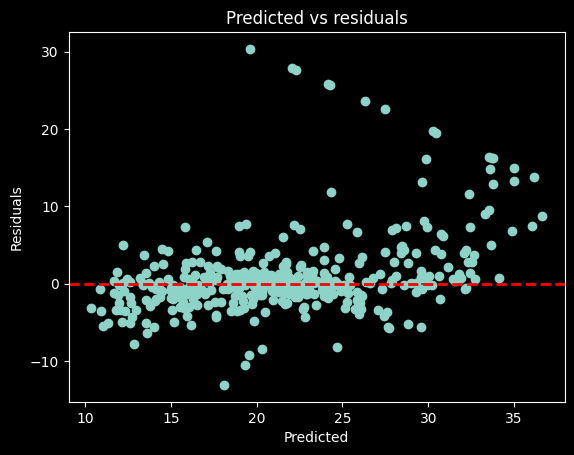

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.axhline(color='red', linestyle='--', linewidth=2)
plt.show()

### **Test Data**

In [ ]:
# Predicting Data Test
y_test_pred = reg.predict(X_test)

In [ ]:
# Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
mae_svm = metrics.mean_absolute_error(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6988219972199836
Adjusted R^2: 0.6543297922638449
MAE: 2.9677542057729376
MSE: 23.580391006295297
RMSE: 4.8559644774540205


# **XGBoost Regressor**

### **Train Data**

In [ ]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train model use Train Sets
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### **Model Evaluation**

In [ ]:
# Prediction Model
y_pred = reg.predict(X_train)

In [ ]:
# Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9999975984095375
Adjusted R^2: 0.9999975183565221
MAE: 0.009723323406559419
MSE: 0.00020630069758811786
RMSE: 0.01436317157135282


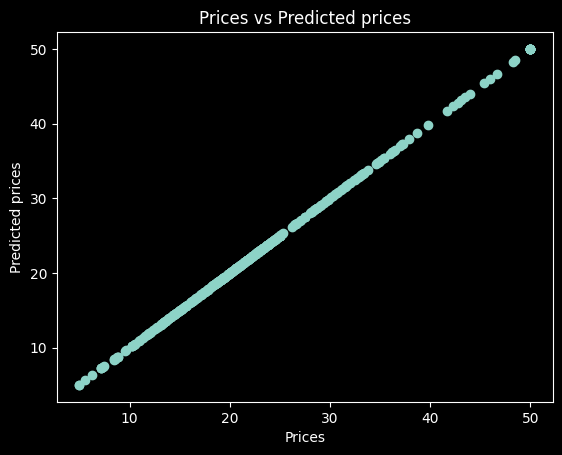

In [ ]:
# Visualizing the differences between Actual Prices and Predicted Values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.axhline(color='red', linestyle='--', linewidth=2)
plt.show()

NameError: ignored

### **Test Data**

In [ ]:
#Predicting Test Data
y_test_pred = reg.predict(X_test)

NameError: ignored

In [ ]:
# Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)

print('R^2:', acc_xgb)
mae_xgb = metrics.mean_absolute_error(y_test, y_test_pred)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

NameError: ignored

# **Evaluation and Comparision of all the models**

In [ ]:
models = pd.DataFrame({'Model': ['Linear Regression', 'Random Forest', 'Support Vector Machines', 'XGBoost Regressor'], 'R-squared Score': [acc_linreg*100, acc_rf*100, acc_svm*100, acc_xgb*100], 'MAE score': [mae_linreg, mae_rf, mae_svm, mae_xgb] })
models.sort_values(by='R-squared Score', ascending=False)

NameError: ignored

In [ ]:
models

NameError: ignored

In [ ]:
models = pd.DataFrame({'Model': ['Linear Regression', 'Random Forest', 'Support Vector Machines', 'XGBoost Regressor'], 'R-squared Score': [acc_linreg*100, acc_rf*100, acc_svm*100, acc_xgb*100], 'MAE score': [mae_linreg, mae_rf, mae_svm, mae_xgb]})
models.sort_values(by= 'MAE score', ascending=True)

,Model,R-squared Score,MAE score
3,XGBoost Regressor,87.469043,2.143904
1,Random Forest,86.764586,2.198765
2,Support Vector Machines,69.882200,2.967754
0,Linear Regression,73.344921,3.213270
